## Sattellite Image classification

#### Import necessary libraries

In [171]:
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns

#### Fetch the training Data

In [173]:
pwd

'C:\\Users\\DHILSHANA SHIRIN\\Edure\\Deep learning\\Capstone projects\\Deep learning Capstone projects (1)\\Deep learning Capstone projects\\Sattellite Image classification\\data'

In [174]:
import glob

In [175]:
cloudy = glob.glob('train_data/cloudy/*.jpg')
desert = glob.glob('train_data/desert/*.jpg')
green_area = glob.glob('train_data/green_area/*.jpg')
water = glob.glob('train_data/water/*.jpg')

In [176]:
water

['train_data/water\\SeaLake_1125.jpg',
 'train_data/water\\SeaLake_1126.jpg',
 'train_data/water\\SeaLake_1127.jpg',
 'train_data/water\\SeaLake_1128.jpg',
 'train_data/water\\SeaLake_1131.jpg',
 'train_data/water\\SeaLake_1132.jpg',
 'train_data/water\\SeaLake_1133.jpg',
 'train_data/water\\SeaLake_1134.jpg',
 'train_data/water\\SeaLake_1135.jpg',
 'train_data/water\\SeaLake_1138.jpg',
 'train_data/water\\SeaLake_1140.jpg',
 'train_data/water\\SeaLake_1141.jpg',
 'train_data/water\\SeaLake_1144.jpg',
 'train_data/water\\SeaLake_1145.jpg',
 'train_data/water\\SeaLake_1146.jpg',
 'train_data/water\\SeaLake_1147.jpg',
 'train_data/water\\SeaLake_1148.jpg',
 'train_data/water\\SeaLake_1151.jpg',
 'train_data/water\\SeaLake_1154.jpg',
 'train_data/water\\SeaLake_1156.jpg',
 'train_data/water\\SeaLake_1157.jpg',
 'train_data/water\\SeaLake_1158.jpg',
 'train_data/water\\SeaLake_1159.jpg',
 'train_data/water\\SeaLake_1160.jpg',
 'train_data/water\\SeaLake_1163.jpg',
 'train_data/water\\SeaLa

#### Fetch the testing data

In [178]:
cloudy_test = glob.glob('test_data/cloudy/*.jpg')
desert_test = glob.glob('test_data/desert/*.jpg')
green_area_test = glob.glob('test_data/green_area/*.jpg')
water_test = glob.glob('test_data/water/*.jpg')

#### Find the number of images of all classes in the Training set

In [180]:
print(f'Number of cloudy images {len(cloudy)}')
print(f'Number of desert images {len(desert)}')
print(f'Number of green area images {len(green_area)}')
print(f'Number of water images {len(water)}')

Number of cloudy images 807
Number of desert images 547
Number of green area images 772
Number of water images 796


#### Find the number of images of all classes in the testing set

In [182]:
print(f'Number of cloudy test images {len(cloudy_test)}')
print(f'Number of desert test images {len(desert_test)}')
print(f'Number of green test area images {len(green_area_test)}')
print(f'Number of water test images {len(water_test)}')

Number of cloudy test images 807
Number of desert test images 547
Number of green test area images 772
Number of water test images 796


#### Store all the images inside a list and create a list with the corresponding labels

#### For Training set

In [185]:
image = []
label = []

for i in cloudy:
    img = plt.imread(i)
    image.append(img)
    label.append(0)

for i in desert:
    img = plt.imread(i)
    image.append(img)
    label.append(1)

for i in green_area:
    img = plt.imread(i)
    image.append(img)
    label.append(2)

for i in water: 
    img = plt.imread(i)
    image.append(img)
    label.append(3)


#### For Testing set

In [187]:
image_test = []
label_test = []

for i in cloudy_test: 
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(0)

for i in desert_test: 
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(1)

for i in green_area_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(2)

for i in water_test: 
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(3)

#### Shuffle both image list and label list (In both Training and testing set)

##### Use shuffle function from sklearn utils

In [190]:
from sklearn.utils import shuffle

In [191]:
image, label = shuffle(image, label, random_state=100)
image_test, label_test = shuffle(image_test, label_test)

In [192]:
len(label_test)

2922

#### Plot a few images from our shuffled list with its corresponding label (Either from training or test set)

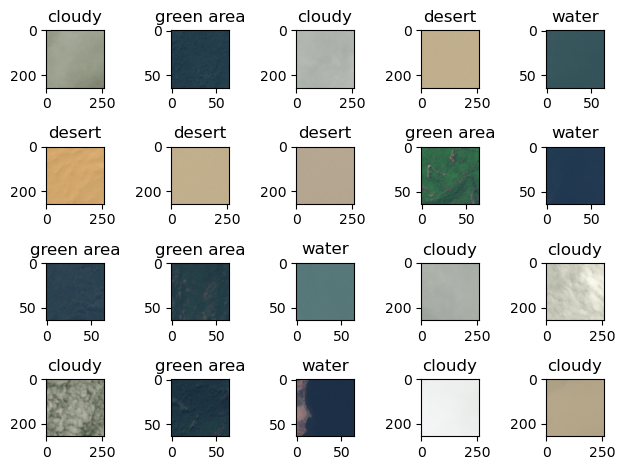

In [194]:
for i in range(20):
    plt.subplot(4,5, i+1)
    plt.imshow(image[i])

    if label[i] == 0:
        plt.title('cloudy')
    elif label[i] == 1: 
        plt.title('desert')
    elif label[i] == 2:
        plt.title('green area')
    else:
        plt.title('water')
    plt.tight_layout()

#### Check the shape of the first 10 images in our list (Either from training or test set)

In [196]:
for i in range(10): 
    print(image[i].shape)

(256, 256, 4)
(64, 64, 3)
(256, 256, 4)
(256, 256, 3)
(64, 64, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(64, 64, 3)
(64, 64, 3)


#### Reshape the images ( For both training and testing set)

Also reassign them to new variables named X_train and X_test and convert them to a numpy array

In [199]:
from skimage.transform import resize

In [215]:
xtrain = []
for i in image: 
    xtrain.append(resize(i,(256,256,3)))
xtrain = np.array(xtrain)

In [216]:
xtest = []
for i in image_test: 
    xtest.append(resize(i,(256,256,3)))
xtest = np.array(xtest)

#### create numpy arrays named y_train and y_test from our training and testing label lists we created earlier

In [217]:
ytrain = np.array(label)
ytest = np.array(label_test)

#### Plot some of our reshaped images

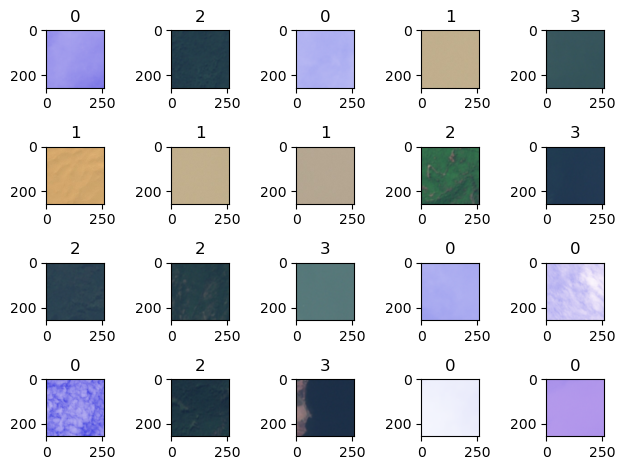

In [219]:
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(xtrain[i])
    plt.title(label[i])
    plt.tight_layout()

#### Check the shape of X_train and X_test and y_train and y_test

In [220]:
print(f'Shape of xtrain is:',xtrain.shape)
print(f'Shape of xtest is:',xtest.shape)
print(f'Shape of ytrain is:',ytrain.shape)
print(f'Shape of ytest is:',ytest.shape)

Shape of xtrain is: (2922, 256, 256, 3)
Shape of xtest is: (2922, 256, 256, 3)
Shape of ytrain is: (2922,)
Shape of ytest is: (2922,)


#### Create a keras Sequential model with convolution layers, Flatten and Hidden layers

In [234]:
from tensorflow import keras

In [248]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16,(3, 3), activation = 'relu', input_shape = (256,256,3)),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Conv2D(32,(3, 3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(4, activation = 'softmax')
])

C:\Users\DHILSHANA SHIRIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Compile the model

In [250]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

#### Check the summary of our model

In [253]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       7,872,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,877,924 (30.05 MB)

 Trainable params: 7,877,924 (30.05 MB)

 Non-trainable params: 0 (0.00 B)

#### Train the model.

In [256]:
model.fit(xtrain, ytrain, epochs = 15, validation_split = 0.1)

Epoch 1/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 50s 465ms/step - accuracy: 0.4287 - loss: 1.9580 - val_accuracy: 0.7406 - val_loss: 0.6268
Epoch 2/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 40s 481ms/step - accuracy: 0.7603 - loss: 0.5044 - val_accuracy: 0.8328 - val_loss: 0.3842
Epoch 3/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 45s 544ms/step - accuracy: 0.7690 - loss: 0.5808 - val_accuracy: 0.8908 - val_loss: 0.2750
Epoch 4/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 38s 451ms/step - accuracy: 0.9027 - loss: 0.2712 - val_accuracy: 0.8874 - val_loss: 0.2647
Epoch 5/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 35s 417ms/step - accuracy: 0.9052 - loss: 0.2204 - val_accuracy: 0.9215 - val_loss: 0.2025
Epoch 6/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 33s 399ms/step - accuracy: 0.9141 - loss: 0.2038 - val_accuracy: 0.9078 - val_loss: 0.1958
Epoch 7/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 33s 398ms/step - accuracy: 0.9110 - loss: 0.1938 - val_accuracy: 0.8908 - val_loss: 0.2967
Epoch 8/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 35s 425ms/step - accuracy: 0.9177 - loss: 0.1904 - val_accu

#### Evaluate the model

In [262]:
model.evaluate(xtrain, ytrain)

92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9120 - loss: 0.1877


[0.19500765204429626, 0.907597541809082]

#### Make predictions with X_test

In [264]:
ypred = model.predict(xtest)

92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 126ms/step


#### Use np.argmax to fetch indices of max element of the array

Store the values in a list

In [267]:
ypred = ypred.argmax(axis=1)

#### Plot X_test with label from our prediction

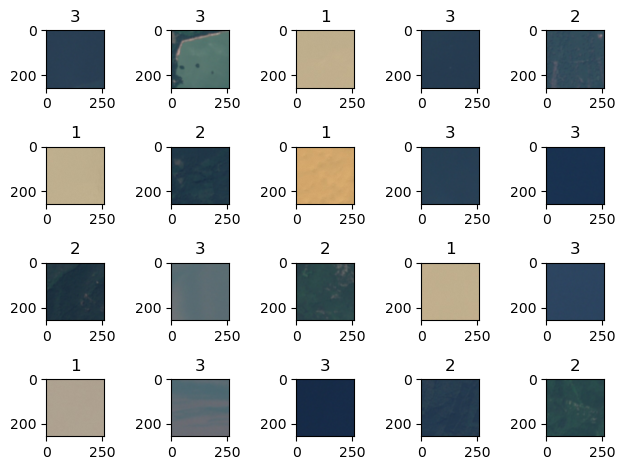

In [272]:
for i in range(20): 
    plt.subplot(4, 5, i+1)
    plt.imshow(xtest[i])
    plt.title(label_test[i])
    plt.tight_layout()

#### Visualise confusion matrix on a heatmap

In [275]:
from sklearn.metrics import ConfusionMatrixDisplay

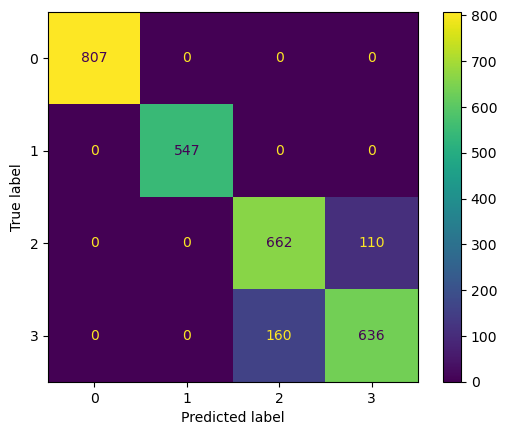

In [277]:
ConfusionMatrixDisplay.from_predictions(ytest, ypred)